In [1]:
!pip install fasttext

  Using cached pybind11-2.6.2-py2.py3-none-any.whl (191 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp38-cp38-win_amd64.whl size=235587 sha256=b38b7d8cf56523a3e9e9df9622e0191b7ee1c5aed1efe85f5c1c442cb808c28b
  Stored in directory: c:\users\juanl\appdata\local\pip\cache\wheels\93\61\2a\c54711a91c418ba06ba195b1d78ff24fcaad8592f2a694ac94
Successfully built fasttext


## FASTTEXT: Word embeddings

https://fasttext.cc/docs/en/unsupervised-tutorial.html

In [6]:
import fasttext
import fasttext.util

In [3]:
!wget https://krono.act.uji.es/NLP-course/juego.txt

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [7]:
model = fasttext.train_unsupervised("juego.txt", minn=3, maxn=5, dim=100, epoch=30)

In [21]:
model.get_word_vector("carta")

array([ 8.13768089e-01,  1.54956833e-01, -3.19034487e-01, -5.54855824e-01,
       -8.28618836e-03, -2.40813494e-01,  1.01128723e-02,  4.13933247e-02,
        2.77294874e-01,  2.22995728e-01, -5.55319786e-01, -2.79001206e-01,
       -1.59979701e-01,  8.85324478e-01, -1.96126044e-01,  1.63304582e-02,
       -7.48362243e-01, -8.45233619e-04,  6.31573200e-02, -6.44064993e-02,
       -4.25919853e-02,  5.68925738e-01, -3.82382959e-01,  1.45298973e-01,
       -1.36601776e-01, -2.86283940e-01, -2.06393629e-01,  5.75634371e-03,
        4.33919132e-02,  4.10238564e-01,  2.65085578e-01,  1.64175868e-01,
       -4.49228883e-02, -6.42999858e-02,  5.83707355e-02, -2.01310039e-01,
        1.15996048e-01, -6.21630019e-03,  2.81171560e-01,  9.06397998e-01,
        1.35634109e-01,  5.74589014e-01,  1.18232071e-01,  3.90509009e-01,
       -2.15023875e-01, -1.62458569e-01, -4.63521004e-01,  4.91882823e-02,
        1.09743617e-01, -2.87255824e-01,  2.46083349e-01, -3.58508438e-01,
       -7.75281340e-02, -

In [22]:
model.get_nearest_neighbors("videojuego")

[(0.7404125928878784, 'videojuego,'),
 (0.7275733947753906, 'videojuegos'),
 (0.7270978689193726, 'videojuegos.'),
 (0.6652621626853943, 'videojuegos,'),
 (0.641011118888855, 'Videojuego'),
 (0.5386030673980713, 'un'),
 (0.5139160752296448, 'es'),
 (0.513723611831665, 'por'),
 (0.508069634437561, 'publicado'),
 (0.48559555411338806, 'juego')]

In [10]:
## Visualización con PCA/TNSE

#from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

words = ['deporte','video','pelota','juego','campo','consola','carta','mesa']
vectors = [model.get_word_vector(w) for w in words]

#X_TNSE = TSNE(n_components=2).fit_transform(vectors)
X_PCA  = PCA(n_components=2).fit_transform(vectors)

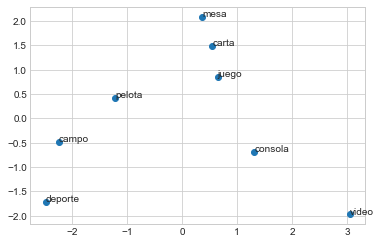

In [24]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()    
ax = plt.axes()
    
ax.scatter([x[0] for x in X_PCA],[x[1] for x in X_PCA])

for i, txt in enumerate(words):
    plt.annotate(txt, X_PCA[i])


## Vectores pre-entrenados

**NOTA**: Estos ficheros suelen ser muy grandes (sobre 4.5G) y tardan mucho en cargarse.

In [25]:
fasttext.util.download_model('es', if_exists='ignore')



KeyboardInterrupt: 

In [ ]:
model_es = fasttext.load_model('cc.es.300.bin')

## Analogías

*x* es a *y* lo que *t* a *z* => `Z = X - Y + T`

In [ ]:
model_es.get_analogies("berlin", "alemania", "francia")

[(0.5998787879943848, 'paris'),
 (0.5952529311180115, 'parís'),
 (0.5838564038276672, 'toulouse'),
 (0.5673896074295044, 'montreal'),
 (0.5640653371810913, 'moscu'),
 (0.5542844533920288, 'louvre'),
 (0.5482965707778931, 'budapest'),
 (0.5421040654182434, 'edimburgo'),
 (0.5403665900230408, 'berlín'),
 (0.5394555926322937, 'praga')]

In [ ]:
##Visualización PCA de analogias

## Embeddings de sentencias como agregados de sus tokens

In [1]:
import pandas as pd

data = pd.read_csv('juego.txt',delimiter='|',header=None,names=['cui','text'])

In [2]:
data.head()

,cui,text
0,00005855n,Se conoce como juego sexual a los preludios de...
1,00007687n,El bacara o baccarat es un juego de cartas muy...
2,00007779n,El backgammon es un juego de mesa para dos jug...
3,00007779n,"Juego de mesa para dos jugadores, cuyas piezas..."
4,00008145n,Juego en el que se usa una pelota.


In [3]:
import nltk
from nltk.tokenize import word_tokenize
import numpy as np

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juanl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
vectors = []

for sentence in data['text']:
  words = [model.get_word_vector(w) for w in word_tokenize(sentence)]
  vectors.append( np.mean( words, axis=0 ) )

In [14]:
##probar con varias sentencias y calcular su distancia
##visualizar

top = 50

S_PCA  = PCA(n_components=2).fit_transform(vectors[:top])


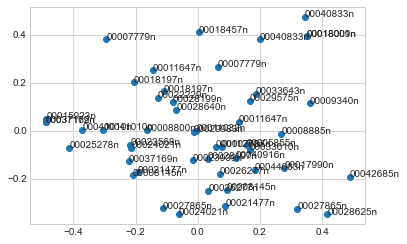

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()    
ax = plt.axes()
    
ax.scatter([x[0] for x in S_PCA],[x[1] for x in S_PCA])

for i, txt in enumerate(data['cui'][:top]):
    plt.annotate(txt, S_PCA[i])